<a href="https://colab.research.google.com/github/varunkr24/AIML/blob/Python/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [3]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = "/content/drive/MyDrive/AIML/Projects/NN Project/NN Project/Autonomous_Vehicles_SVHN_single_grey1.h5"

In [9]:
f = h5py.File(path, 'r')

In [10]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [11]:
f['X_test'].shape

(18000, 32, 32)

In [12]:
f['X_train'].shape

(42000, 32, 32)

Label: 7


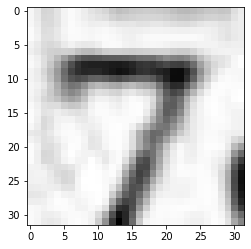

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(f['y_train'][8000]))
plt.imshow(f['X_train'][8000], cmap='gray')

In [17]:
print(f['X_train'].shape)
print(f['y_train'].shape)
print(f['X_test'].shape)
print(f['y_test'].shape)
print(f['X_val'].shape)
print(f['y_val'].shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


In [18]:
x_train = f['X_val'].value.reshape(f['X_val'].shape[0], 32, 32,1)
x_val = f['X_train'].value.reshape(f['X_train'].shape[0], 32, 32,1)
x_test = f['X_test'].value.reshape(f['X_test'].shape[0], 32, 32,1)

In [23]:
y_train = f['y_val']
y_val = f['y_train']
y_test = f['y_test']

In [19]:
x_train.shape

(60000, 32, 32, 1)

In [20]:
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

In [22]:
print("x_train shape:", x_train.shape)
print("Images in x_train:", x_train.shape[0])
print("Images in x_test:", x_test.shape[0])
print("Max value in x_train:", x_test.max())
print("Min value in x_train:", x_test.min())
print("Max value in x_test:", x_test.max())
print("Min value in x_test:", x_test.min())

x_train shape: (60000, 32, 32, 1)
Images in x_train: 60000
Images in x_test: 18000
Max value in x_train: 0.9999
Min value in x_train: 0.0
Max value in x_test: 0.9999
Min value in x_test: 0.0


In [24]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [25]:
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [27]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2858 - accuracy: 0.1477 - val_loss: 2.1403 - val_accuracy: 0.3398
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0650 - accuracy: 0.3653 - val_loss: 1.7964 - val_accuracy: 0.5246
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7294 - accuracy: 0.5087 - val_loss: 1.5311 - val_accuracy: 0.5786
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4727 - accuracy: 0.5897 - val_loss: 1.3640 - val_accuracy: 0.6161
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3149 - accuracy: 0.6323 - val_loss: 1.2357 - val_accuracy: 0.6450
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2059 - accuracy: 0.6547 - val_loss: 1.1592 - val_accuracy: 0.6694
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1327 - accuracy: 0.6729 - val_loss: 1.0876 - val_accuracy:

In [ ]:
def create_model(lr, Lambda):

    ## hyperparameters
    learning_rate = lr
    hidden_nodes = 11
    output_nodes = 1
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(11,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=lr, decay=1e-7, momentum=0.9)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])
    return model
    
    